# DEMO: Overfitting, Cross-Validation, Weight-Regularization

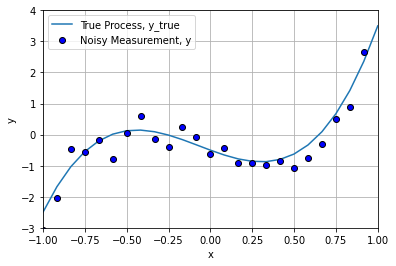

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

nsamp = 25 # number of samples taken
p = np.array([5,1,-2,-.5]) # true process coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
y = y_true + np.random.normal(0, np.sqrt(var), nsamp)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y,'ob',markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

In [8]:
# train test validation split
ntrain = 15
nval = 5
ntest = 5

inds = np.random.permutation(nsamp)
train_choices = inds[:ntrain]
val_choices = inds[ntrain:ntrain+nval]
test_choices = inds[ntrain+nval:]

xtrain, ytrain = x[train_choices], y[train_choices]
xval, yval     = x[val_choices], y[val_choices]
xtest, ytest   = x[test_choices], y[test_choices]

In [9]:
# forming the design matrix
# model order M
M = 25

def designMatrix(z):
    z = z.reshape(-1,1)
    bias_col = np.ones((z.shape[0],1))
    Z = bias_col
    for i in np.arange(1, M+1):
        Z = np.hstack([Z,z**i])
    return Z

Xtrain = designMatrix(xtrain)
print(Xtrain.shape)

(15, 26)


Train RMSE = 0.0000
Test RMSE = 38140.4729


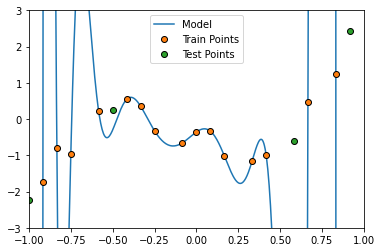

w = 
[[    -0.36]
 [     3.2 ]
 [   -19.68]
 [  -193.33]
 [   -69.28]
 [  1763.38]
 [  5223.89]
 [ -2436.78]
 [-33677.87]
 [-20303.37]
 [ 57927.2 ]
 [ 37892.56]
 [ -4997.21]
 [ 25277.22]
 [-19811.7 ]
 [-11591.28]
 [ -8200.17]
 [-31913.5 ]
 [ -1017.75]
 [-31124.12]
 [ -4116.52]
 [-18135.72]
 [-13181.41]
 [ -1655.02]
 [-23336.53]
 [ 13198.94]]


In [4]:
from sklearn import linear_model

# fitting the model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(Xtrain,ytrain)
w = reg.coef_

# training error
yhat = reg.predict(Xtrain)
RMSE = np.sqrt( np.mean((ytrain-yhat)**2) )
print("Train RMSE = %.4f" % RMSE)

# test error
Xtest = designMatrix(xtest)
yhat = reg.predict(Xtest)
RMSE = np.sqrt( np.mean((ytest-yhat)**2) )
print("Test RMSE = %.4f" % RMSE)

# plotting
x_line = np.linspace(-1,1,500).reshape(-1,1)
X_line = designMatrix(x_line)
y_line = reg.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
plt.xlim([-1,1])
plt.ylim([-3,3])
plt.legend(['Model','Train Points', 'Test Points'])
plt.show()

print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

Train RMSE = 0.1921
Val RMSE = 0.4112


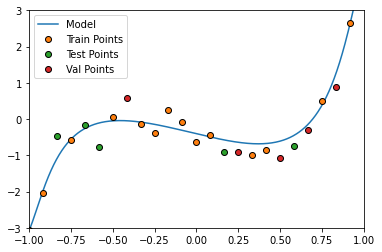

w = 
[[-0.4 ]
 [-1.11]
 [ 0.16]
 [ 1.74]
 [ 0.49]
 [ 1.48]
 [ 0.3 ]
 [ 1.05]
 [ 0.14]
 [ 0.7 ]
 [ 0.05]
 [ 0.44]
 [ 0.01]
 [ 0.24]
 [-0.02]
 [ 0.09]
 [-0.03]
 [-0.03]
 [-0.04]
 [-0.13]
 [-0.04]
 [-0.21]
 [-0.04]
 [-0.28]
 [-0.04]
 [-0.33]]


In [11]:
# weight based regularization (squaring the weights in the cost function is called "ridge regression")

# fitting the model
reg = linear_model.Ridge(alpha=0.05, fit_intercept=False, solver='cholesky')
reg.fit(Xtrain,ytrain)
w = reg.coef_

# training error
yhat = reg.predict(Xtrain)
RMSE = np.sqrt( np.mean((ytrain-yhat)**2) )
print("Train RMSE = %.4f" % RMSE)

# validation error
Xval = designMatrix(xval)
yhat = reg.predict(Xval)
RMSE = np.sqrt( np.mean((yval-yhat)**2) )
print("Val RMSE = %.4f" % RMSE)

# plotting
x_line = np.linspace(-1,1,500).reshape(-1,1)
X_line = designMatrix(x_line)
y_line = reg.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
plt.plot(xval,yval,'o',markeredgecolor='black')
plt.xlim([-1,1])
plt.ylim([-3,3])
plt.legend(['Model','Train Points', 'Test Points', 'Val Points'])
plt.show()

print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

In [6]:
# test error
Xtest = designMatrix(xtest)
yhat = reg.predict(Xtest)
RMSE = np.sqrt( np.mean((ytest-yhat)**2) )
print("Test RMSE = %.4f" % RMSE)

Test RMSE = 0.2373
